##Librerias

In [ ]:
# Para esta actividad se importarán las siguientes librerías:
# Visualización y manejo de datos
from IPython.display import HTML  # Para mostrar contenido HTML en notebooks
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas y manejo de matrices
import seaborn as sns  # Para visualización de datos
from pandas.plotting import scatter_matrix  # Para crear matrices de dispersión

# Gráficos
from matplotlib import pyplot as plt  # Para crear gráficos
from sklearn.tree import plot_tree  # Para visualizar árboles de decisión

# Preprocesamiento y escalado
from sklearn.preprocessing import LabelEncoder  # Para codificación de etiquetas
from sklearn.preprocessing import StandardScaler  # Para escalado de características

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression  # Para regresión logística
from sklearn.tree import DecisionTreeClassifier  # Para árboles de decisión
from sklearn.ensemble import RandomForestClassifier  # Para bosques aleatorios
from sklearn.svm import SVC  # Para máquinas de vectores de soporte
from sklearn.naive_bayes import GaussianNB  # Para clasificador Naive Bayes

# Métricas
from sklearn.metrics import classification_report  # Para reporte de clasificación
from sklearn.metrics import silhouette_score  # Para evaluar agrupaciones
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Para matrices de confusión
from sklearn.metrics import accuracy_score  # Para calcular la precisión
from sklearn.metrics import precision_score  # Para calcular la precisión
from sklearn.metrics import recall_score  # Para calcular el recall
from sklearn.metrics import f1_score  # Para calcular la métrica F1
from sklearn.metrics import mean_squared_error  # Para calcular el error cuadrático medio
from sklearn.metrics import r2_score  # Para calcular el coeficiente de determinación

# División de datos y validación cruzada
from sklearn.model_selection import train_test_split  # Para dividir el conjunto de datos
from sklearn.model_selection import cross_val_score  # Para validación cruzada
from sklearn.model_selection import StratifiedKFold  # Para validación cruzada estratificada
from sklearn.model_selection import KFold  # Para validación cruzada K-Fold
from sklearn.model_selection import permutation_test_score  # Para pruebas de permutación

# Generación de datasets
from sklearn.datasets import make_classification  # Para crear conjuntos de datos de clasificación

# Estadísticas
from scipy import stats  # Para pruebas estadísticas


##Preparacion de Datos

In [ ]:
df = pd.read_csv('alzheimer.csv')
df

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,Nondemented
2,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,Demented
3,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,Demented
4,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,Demented
...,...,...,...,...,...,...,...,...,...,...
368,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,Demented
369,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,Demented
370,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
371,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


Analisis de Variables

In [ ]:
# **M/F:** Género del sujeto (M para masculino, F para femenino).
# **Age:** Edad del sujeto en el momento del estudio.
# **Education:** Nivel educativo del sujeto medido en años de educación.
# **SES (Socioeconomic Status):** Estatus socioeconómico del sujeto, medido en una escala cualitativa.
# **MMSE (Mini-Mental State Examination):** Puntuación en una prueba estandarizada que evalúa el estado mental del sujeto. Se utiliza comúnmente para diagnosticar demencia.
# **CDR (Clinical Dementia Rating):** Escala que mide la severidad de la demencia en el sujeto, desde 0 (sin demencia) hasta 3 (demencia severa).
# **eTIV (Estimated Total Intracranial Volume):** Volumen total intracraneal estimado, medido en milímetros cúbicos.
# **nWBV (Normalized Whole Brain Volume):** Volumen total del cerebro normalizado, expresado como un porcentaje del volumen intracraneal total.
# **ASF (Atlas Scaling Factor):** Factor de escala utilizado para normalizar los volúmenes cerebrales según un atlas de referencia.

# Variable de trabajo
# Group: Indica la clasificación del sujeto en uno de los tres grupos:

# Demented: Personas diagnosticadas con demencia.
# No Demented: Personas sin demencia.
# Converted: Personas que inicialmente no tenían demencia, pero que desarrollaron la enfermedad durante el seguimiento.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     373 non-null    object 
 1   Age     373 non-null    int64  
 2   EDUC    373 non-null    int64  
 3   SES     354 non-null    float64
 4   MMSE    371 non-null    float64
 5   CDR     373 non-null    float64
 6   eTIV    373 non-null    int64  
 7   nWBV    373 non-null    float64
 8   ASF     373 non-null    float64
 9   Group   373 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


##Tratamiento de Datos Nulos

In [ ]:
# Obtener una Serie que indica cuántos valores nulos hay en cada columna
null_counts = df.isnull().sum()

# Filtrar las columnas que tienen al menos un valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Imprimir la lista de columnas y la cantidad de valores nulos en cada una
for column, count in columns_with_nulls.items():
    print(f"Columna '{column}' tiene {count} valores nulos.")

Columna 'SES' tiene 19 valores nulos.
Columna 'MMSE' tiene 2 valores nulos.


In [ ]:
df = df.fillna(df.mean(numeric_only=True))
#Valores nulos El comando df.fillna(df.mean()) se utiliza para rellenar los valores faltantes (NaN) en un DataFrame df con la media de cada columna correspondiente.

In [ ]:
# Obtener una Serie que indica cuántos valores nulos hay en cada columna
null_counts = df.isnull().sum()

# Filtrar las columnas que tienen al menos un valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Imprimir la lista de columnas y la cantidad de valores nulos en cada una
for column, count in columns_with_nulls.items():
    print(f"Columna '{column}' tiene {count} valores nulos.")

##Visualizaion de datos

Para realizar la gráfica de corelación de Pearson es necesario que todos los valores sean numéricos.

In [ ]:
# Lista de columnas categóricas que se quiere codificar
categorical_columns = ['M/F']

# Aplicar One Hot Encoding a las columnas categóricas
df = pd.get_dummies(df, columns=categorical_columns)

print('ONE HOT ENCODING TERMINADO')
print(df.head())

ONE HOT ENCODING TERMINADO
   Age  EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF        Group  M/F_F  \
0   87    14  2.000000  27.0  0.0  1987  0.696  0.883  Nondemented  False   
1   88    14  2.000000  30.0  0.0  2004  0.681  0.876  Nondemented  False   
2   75    12  2.460452  23.0  0.5  1678  0.736  1.046     Demented  False   
3   76    12  2.460452  28.0  0.5  1738  0.713  1.010     Demented  False   
4   80    12  2.460452  22.0  0.5  1698  0.701  1.034     Demented  False   

   M/F_M  
0   True  
1   True  
2   True  
3   True  
4   True  


In [ ]:
df2 = df.copy()

In [ ]:
encoder = LabelEncoder()
df2['Group'] = encoder.fit_transform(df['Group'])

<Axes: >

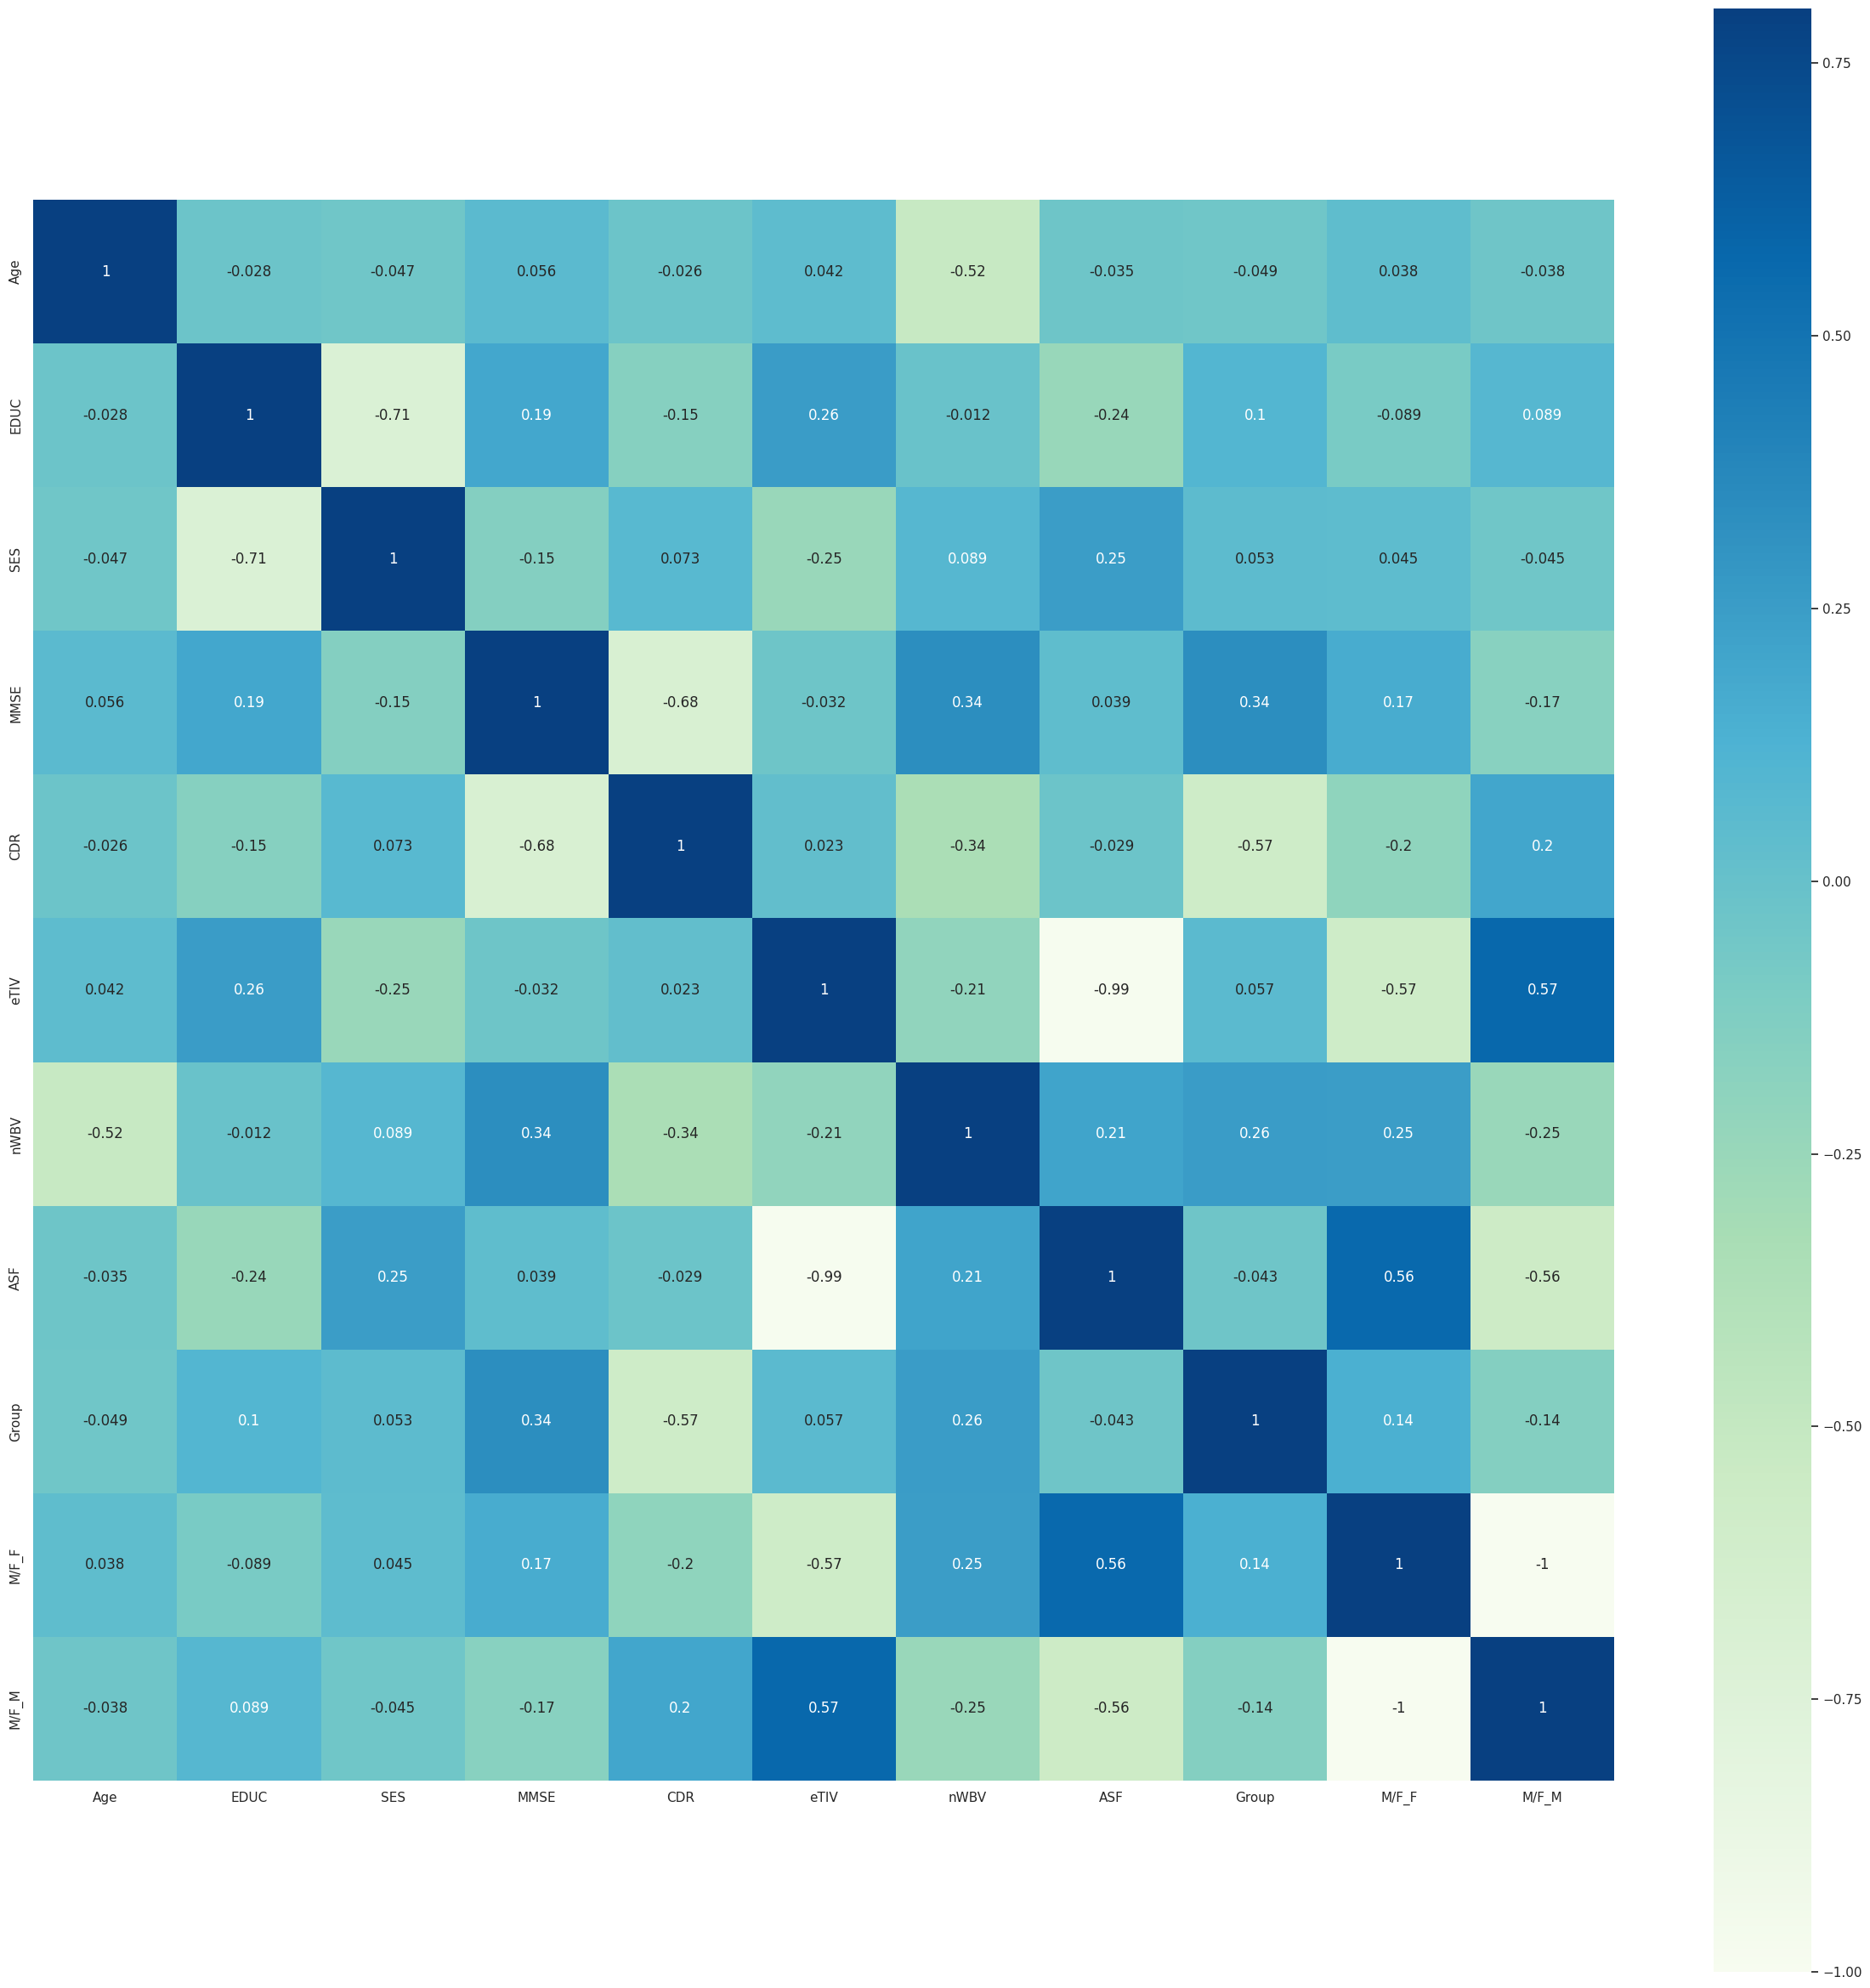

In [ ]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True)

Se eliminaran las variables "Age", "SES", "eTIV", "ASF" debido a que en el gráfico de correlacion de pearson muestra que dichas variables no son influyentes dentro de la data para lo cual existe la posibilidad de que generen ruido.

In [ ]:
df = df.drop(columns=['Age'])
df = df.drop(columns=['SES'])
df = df.drop(columns=['eTIV'])
df = df.drop(columns=['ASF'])

##Modelos de Aprendizaje Supervizado

#Zero Rule (Zero R)

In [ ]:
# Asumimos que los datos ya están cargados en el DataFrame df

# Seleccionar características numéricas
numeric_features = ['M/F_F', 'EDUC', 'M/F_M', 'CDR', 'nWBV', 'MMSE']
target = 'Group'

# Dividir en características (X) y variable objetivo (y)
X = df[numeric_features]
y = df[target]

# Convertir la variable objetivo a valores numéricos usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Implementación del modelo ZeroR
class ZeroR:
    def fit(self, X, y):
        # Encontrar la clase mayoritaria
        from collections import Counter
        self.majority_class_ = Counter(y).most_common(1)[0][0]

    def predict(self, X):
        # Predecir siempre la clase mayoritaria
        return [self.majority_class_] * len(X)

# Crear una instancia del modelo ZeroR
zero_r_model = ZeroR()

# Entrenar el modelo ZeroR
zero_r_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = zero_r_model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# Realizar validación cruzada manualmente
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)

accuracy_scores = []

for train_index, test_index in kf.split(X, y):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]

    zero_r_model.fit(X_train_kf, y_train_kf)
    y_pred_kf = zero_r_model.predict(X_test_kf)

    accuracy_scores.append(accuracy_score(y_test_kf, y_pred_kf))

print(f'Cross-validated Accuracy: {np.mean(accuracy_scores):.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        29
           2       0.52      1.00      0.68        39

    accuracy                           0.52        75
   macro avg       0.17      0.33      0.23        75
weighted avg       0.27      0.52      0.36        75

Confusion Matrix:
[[ 0  0  7]
 [ 0  0 29]
 [ 0  0 39]]
Test Accuracy: 0.5200
Cross-validated Accuracy: 0.5094


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Naive Bayes Classificator

In [ ]:
# Seleccionar características numéricas
numeric_features = ['M/F_F', 'EDUC', 'M/F_M', 'CDR', 'nWBV', 'MMSE']
target = 'Group'

# Dividir en características (X) y variable objetivo (y)
X = df[numeric_features]
y = df[target]

# Convertir la variable objetivo a valores numéricos usando LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Configuración del modelo Naive Bayes
nb_model = GaussianNB()

# Configuración de la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)

# Realizar validación cruzada
cv_accuracy_scores = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')
print(f'Cross-validated Accuracy: {np.mean(cv_accuracy_scores):.4f}')

# Realizar el test de permutación para obtener el p-value
score, permutation_scores, p_value = permutation_test_score(nb_model, X, y, cv=kf, n_permutations=100, scoring='accuracy', random_state=36)
print(f'Permutation test p-value: {p_value:.4f}')

# Entrenar el modelo final en todos los datos de entrenamiento y evaluar en el conjunto de prueba
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Evaluación del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Cross-validated Accuracy: 0.8713
Permutation test p-value: 0.0099
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.93      0.97      0.95        29
           2       0.86      0.97      0.92        39

    accuracy                           0.88        75
   macro avg       0.60      0.65      0.62        75
weighted avg       0.81      0.88      0.84        75

Confusion Matrix:
[[ 0  1  6]
 [ 1 28  0]
 [ 0  1 38]]
Test Accuracy: 0.8800


#Random Forest Classificator

In [ ]:
# Seleccionar características numéricas
numeric_features = ['M/F_F', 'EDUC', 'M/F_M', 'CDR', 'nWBV', 'MMSE']
target = 'Group'

# Dividir en características (X) y variable objetivo (y)
X = df[numeric_features]
y = df[target]

# Convertir la variable objetivo a valores numéricos usando LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Configuración del modelo Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=36)

# Configuración de la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=36)

# Realizar validación cruzada
cv_accuracy_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
cv_precision_scores = cross_val_score(rf, X, y, cv=kf, scoring='precision_macro')
cv_recall_scores = cross_val_score(rf, X, y, cv=kf, scoring='recall_macro')
cv_f1_scores = cross_val_score(rf, X, y, cv=kf, scoring='f1_macro')

print(f'Cross-validated Accuracy: {np.mean(cv_accuracy_scores):.4f}')

# Realizar el test de permutación para obtener el p-value
score, permutation_scores, p_value = permutation_test_score(rf, X, y, cv=kf, n_permutations=100, scoring='accuracy', random_state=36)

print(f'Permutation test p-value: {p_value:.4f}')

# Entrenar el modelo final en los datos de entrenamiento
rf.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
y_test_pred = rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

print(f'Test Accuracy: {test_accuracy:.4f}')

Cross-validated Accuracy: 0.9035
Permutation test p-value: 0.0099
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.97      1.00      0.98        29
           2       0.86      0.97      0.92        39

    accuracy                           0.91        75
   macro avg       0.94      0.71      0.72        75
weighted avg       0.92      0.91      0.88        75

Confusion Matrix:
[[ 1  0  6]
 [ 0 29  0]
 [ 0  1 38]]
Test Accuracy: 0.9067


##Suport Vector Machine (SVM)

In [ ]:
# Seleccionar características numéricas
numeric_features = ['M/F_F', 'EDUC', 'M/F_M', 'CDR', 'nWBV', 'MMSE']
target = 'Group'

# Dividir en características (X) y variable objetivo (y)
X = df[numeric_features]
y = df[target]

# Convertir la variable objetivo a valores numéricos usando LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Configuración del modelo SVM
svm_model = SVC(kernel='linear', random_state=36)

# Configuración de la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)

# Realizar validación cruzada
cv_accuracy_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')
print(f'Cross-validated Accuracy: {np.mean(cv_accuracy_scores):.4f}')

# Entrenar el modelo final en todos los datos de entrenamiento y evaluar en el conjunto de prueba
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluación del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# Comparación de las precisiones de validación cruzada con la precisión del test usando prueba t de Student
# Convertir precisión del test en un array para la comparación
test_accuracy_array = np.array([accuracy_score(y_test, y_pred)])

# Realizar prueba t para comparar las precisiones
t_statistic, p_value = stats.ttest_ind(cv_accuracy_scores, test_accuracy_array)

print(f'T-statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')


Cross-validated Accuracy: 0.8927
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.94      1.00      0.97        29
           2       0.86      0.97      0.92        39

    accuracy                           0.89        75
   macro avg       0.60      0.66      0.63        75
weighted avg       0.81      0.89      0.85        75

Confusion Matrix:
[[ 0  1  6]
 [ 0 29  0]
 [ 0  1 38]]
Test Accuracy: 0.8933
T-statistic: -0.0558
P-value: 0.9582


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
